# Batch - DP1806
# Team Member - Payal Agrawal

In [82]:
import pandas as pd

train = pd.read_csv("train.csv")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [83]:
test = pd.read_csv("test.csv")
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [84]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [85]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [86]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [87]:
train.groupby(['target']).size() #data is very unbalanced with respect to target value

target
0    179902
1     20098
dtype: int64

# Normalizing the data

In [88]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
cols = train.iloc[:,2:]
ss = StandardScaler()
train.iloc[:,2:] = ss.fit_transform(train.iloc[:,2:])
test.iloc[:,1:] = ss.fit_transform(test.iloc[:,1:])

train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,train_1,0,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,train_2,0,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,train_3,0,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,train_4,0,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


# split the x features and target value

In [89]:
x_train = train.iloc[:,2:]
y_train = train['target']

x_test = test.iloc[:,1:]
x_test.shape

(200000, 200)

In [90]:
#validation set

x_val = x_train[:100000]
partial_x_train = x_train[100000:]

y_val = y_train[:100000]
partial_y_train = y_train[100000:]



In [91]:
print(x_val.shape)
print(partial_x_train.shape)

print(y_val.shape)
print(partial_y_train.shape)


(100000, 200)
(100000, 200)
(100000,)
(100000,)


In [92]:
x_val[0:1]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.53643,-0.334926,0.608751,-1.56158,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135


In [93]:
from keras import models
from keras import layers

#16,16,1 architecture
model_16_16 = models.Sequential()
model_16_16.add(layers.Dense(16, activation='relu', input_shape=(200,)))
model_16_16.add(layers.Dense(16, activation='relu'))
model_16_16.add(layers.Dense(1, activation='sigmoid'))


#64,128,32,1 architecture
model_64_128_32 = models.Sequential()
model_64_128_32.add(layers.Dense(64, activation='relu', input_shape=(200,)))
model_64_128_32.add(layers.Dense(128, activation='relu'))
model_64_128_32.add(layers.Dense(32, activation='relu'))
model_64_128_32.add(layers.Dense(1, activation='sigmoid'))



#128,64,32,16,1 architecture
model_128_64_32_16 = models.Sequential()
model_128_64_32_16.add(layers.Dense(128, activation='relu', input_shape=(200,)))
model_128_64_32_16.add(layers.Dense(64, activation='relu'))
model_128_64_32_16.add(layers.Dense(32, activation='relu'))
model_128_64_32_16.add(layers.Dense(16, activation='relu'))
model_128_64_32_16.add(layers.Dense(1, activation='sigmoid'))

In [94]:
model_16_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


model_64_128_32.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model_128_64_32_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [95]:
history_16_16 = model_16_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_64_128_32 = model_64_128_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_128_64_32_16 = model_128_64_32_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 2s 21us/step - loss: 0.3039 - acc: 0.8974 - val_loss: 0.2653 - val_acc: 0.9008
Epoch 2/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2526 - acc: 0.9042 - val_loss: 0.2558 - val_acc: 0.9055
Epoch 3/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2424 - acc: 0.9092 - val_loss: 0.2514 - val_acc: 0.9075
Epoch 4/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2361 - acc: 0.9115 - val_loss: 0.2486 - val_acc: 0.9083
Epoch 5/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2318 - acc: 0.9136 - val_loss: 0.2469 - val_acc: 0.9093
Epoch 6/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2287 - acc: 0.9143 - val_loss: 0.2462 - val_acc: 0.9093
Epoch 7/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2265 - acc: 0.9155 - val_loss: 

100000/100000 [==============================] - 2s 15us/step - loss: 0.0653 - acc: 0.9772 - val_loss: 0.6044 - val_acc: 0.8521
Epoch 19/20
100000/100000 [==============================] - 2s 15us/step - loss: 0.0599 - acc: 0.9792 - val_loss: 0.6708 - val_acc: 0.8539
Epoch 20/20
100000/100000 [==============================] - 2s 15us/step - loss: 0.0552 - acc: 0.9801 - val_loss: 0.6235 - val_acc: 0.8857


In [96]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

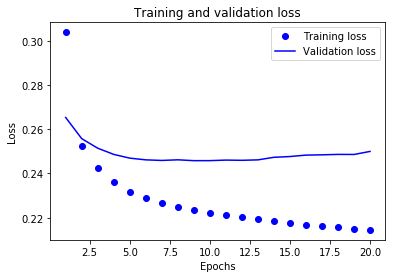

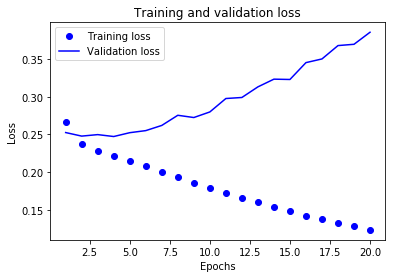

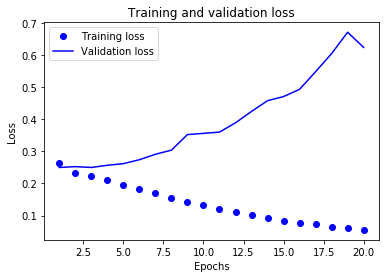

In [97]:
#accuracy and loss graph
import matplotlib.pyplot as plt

#16_16 model
history_dict = history_16_16.history
loss_values = history_dict['loss']

acc =  history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



#64_128_32 model
history_dict = history_64_128_32.history
loss_values = history_dict['loss']

acc =  history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



#128,64,32,16 model
history_dict = history_128_64_32_16.history
loss_values = history_dict['loss']

acc =  history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# After looking at the loss graph, 64_128_32 and 128_64_32_16 models are overfitting. 

# Training loss is decresing continously after each epoch but validation loss is increasing.

# To avoid overfitting, try less number of epochs and see the result.

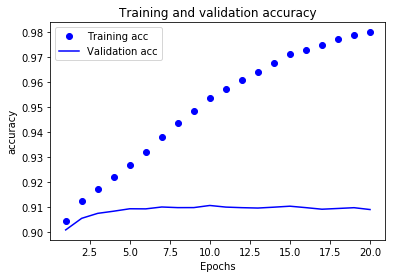

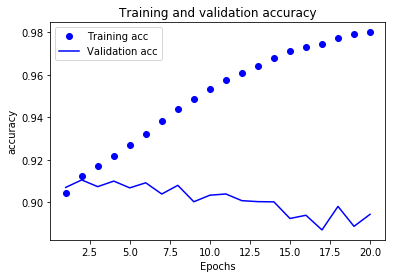

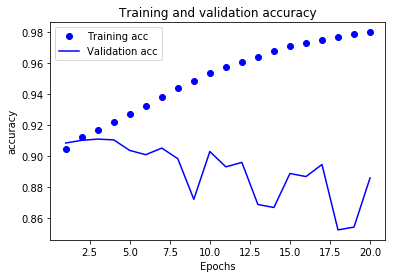

In [98]:
plt.clf()
history_dict = history_16_16.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


history_dict = history_64_128_32.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

history_dict = history_128_64_32_16.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


# After looking at the accuracy graph, 64_128_32 and 128_64_32_16 models are overfitting. 

# Training accuracy is increasing continously after each epoch but validation accuracy is decreasing.

# To avoid overfitting, try less number of epochs and see the result.

In [99]:
#confusion matrix, precision score for training data

from sklearn.metrics import confusion_matrix,precision_score
import numpy as np

print("confusion matrix and details for 16_16 model")

y_train_pred = model_16_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

print("\n")
print("confusion matrix and details for 64_128_32 model")

y_train_pred = model_64_128_32.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))


print("\n")
print("confusion matrix and details for 128_64_32_16 model")

y_train_pred = model_128_64_32_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

confusion matrix and details for 16_16 model
True Negatives:  176376
False Positives:  3526
False Negatives:  13429
True Positives:  6669
Accuracy 91.52%:
Precision 0.65
Recall 0.33


confusion matrix and details for 64_128_32 model
True Negatives:  176297
False Positives:  3605
False Negatives:  11053
True Positives:  9045
Accuracy 92.67%:
Precision 0.72
Recall 0.45


confusion matrix and details for 128_64_32_16 model
True Negatives:  175328
False Positives:  4574
False Negatives:  8271
True Positives:  11827
Accuracy 93.58%:
Precision 0.72
Recall 0.59


# 16_16 model:
    Accuracy is 91.52%, Precision is 0.65, Recall is 0.33

# 64_128_32 model:    
    Accuracy is 92.67%, Precision is 0.72, Recall is 0.45 
    Accuracy have improved as compare to 16_16. Recall have increased. False negatives have reduced, True positives have increased
    
# 128_64_32_16 model:    
    Accuracy is 93.58%, Precision is 0.72, Recall is 0.59 
    Accuracy have improved as compare to other models. Recall have increased. False negatives have reduced, True positives have increased

In [100]:
#Predict the target values for test data

model_16_16 = models.Sequential()
model_16_16.add(layers.Dense(16, activation='relu', input_shape=(200,)))
model_16_16.add(layers.Dense(16, activation='relu'))
model_16_16.add(layers.Dense(1, activation='sigmoid'))
model_16_16.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model_16_16.fit(x_train, y_train, epochs=20, batch_size=512)
y_test = model_16_16.predict(x_test)



model_64_128_32 = models.Sequential()
model_64_128_32.add(layers.Dense(64, activation='relu', input_shape=(200,)))
model_64_128_32.add(layers.Dense(128, activation='relu'))
model_64_128_32.add(layers.Dense(32, activation='relu'))
model_64_128_32.add(layers.Dense(1, activation='sigmoid'))
model_64_128_32.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model_64_128_32.fit(x_train, y_train, epochs=20, batch_size=512)
y_test = model_64_128_32.predict(x_test)



model_128_64_32_16 = models.Sequential()
model_128_64_32_16.add(layers.Dense(128, activation='relu', input_shape=(200,)))
model_128_64_32_16.add(layers.Dense(64, activation='relu'))
model_128_64_32_16.add(layers.Dense(32, activation='relu'))
model_128_64_32_16.add(layers.Dense(16, activation='relu'))
model_128_64_32_16.add(layers.Dense(1, activation='sigmoid'))
model_128_64_32_16.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model_128_64_32_16.fit(x_train, y_train, epochs=20, batch_size=512)
y_test = model_128_64_32_16.predict(x_test)

Epoch 1/20
200000/200000 [==============================] - 2s 12us/step - loss: 0.2814 - acc: 0.9014
Epoch 2/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2429 - acc: 0.9108
Epoch 3/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2360 - acc: 0.9128
Epoch 4/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2328 - acc: 0.9136
Epoch 5/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2311 - acc: 0.9143
Epoch 6/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2298 - acc: 0.9148
Epoch 7/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2289 - acc: 0.9149
Epoch 8/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2283 - acc: 0.9150
Epoch 9/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2277 - acc: 0.9150
Epoch 10/20
200000/200000 [==============================] - 2s 8us/step - loss: 0.2271 - 

# Model with less number of epochs to avoid overfitting

In [101]:
#16,16,1 architecture
model_16_16 = models.Sequential()
model_16_16.add(layers.Dense(16, activation='relu', input_shape=(200,)))
model_16_16.add(layers.Dense(16, activation='relu'))
model_16_16.add(layers.Dense(1, activation='sigmoid'))


#64,128,32,1 architecture
model_64_128_32 = models.Sequential()
model_64_128_32.add(layers.Dense(64, activation='relu', input_shape=(200,)))
model_64_128_32.add(layers.Dense(128, activation='relu'))
model_64_128_32.add(layers.Dense(32, activation='relu'))
model_64_128_32.add(layers.Dense(1, activation='sigmoid'))



#128,64,32,16,1 architecture
model_128_64_32_16 = models.Sequential()
model_128_64_32_16.add(layers.Dense(128, activation='relu', input_shape=(200,)))
model_128_64_32_16.add(layers.Dense(64, activation='relu'))
model_128_64_32_16.add(layers.Dense(32, activation='relu'))
model_128_64_32_16.add(layers.Dense(16, activation='relu'))
model_128_64_32_16.add(layers.Dense(1, activation='sigmoid'))


model_16_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


model_64_128_32.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model_128_64_32_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history_16_16 = model_16_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_64_128_32 = model_64_128_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_128_64_32_16 = model_128_64_32_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 2s 23us/step - loss: 0.3377 - acc: 0.8869 - val_loss: 0.2640 - val_acc: 0.9003
Epoch 2/20
100000/100000 [==============================] - 1s 12us/step - loss: 0.2526 - acc: 0.9037 - val_loss: 0.2523 - val_acc: 0.9074
Epoch 3/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2423 - acc: 0.9097 - val_loss: 0.2478 - val_acc: 0.9093
Epoch 4/20
100000/100000 [==============================] - 1s 13us/step - loss: 0.2363 - acc: 0.9116 - val_loss: 0.2458 - val_acc: 0.9096
Epoch 5/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2325 - acc: 0.9128 - val_loss: 0.2450 - val_acc: 0.9098
Epoch 6/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2297 - acc: 0.9137 - val_loss: 0.2439 - val_acc: 0.9106
Epoch 7/20
100000/100000 [==============================] - 1s 11us/step - loss: 0.2275 - acc: 0.9146 - val_loss: 

In [102]:
#confusion matrix, precision score for training data

from sklearn.metrics import confusion_matrix,precision_score
import numpy as np

print("confusion matrix and details for 16_16 model")

y_train_pred = model_16_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

print("\n")
print("confusion matrix and details for 64_128_32 model")

y_train_pred = model_64_128_32.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))


print("\n")
print("confusion matrix and details for 128_64_32_16 model")

y_train_pred = model_128_64_32_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

confusion matrix and details for 16_16 model
True Negatives:  176702
False Positives:  3200
False Negatives:  13849
True Positives:  6249
Accuracy 91.48%:
Precision 0.66
Recall 0.31


confusion matrix and details for 64_128_32 model
True Negatives:  174927
False Positives:  4975
False Negatives:  11969
True Positives:  8129
Accuracy 91.53%:
Precision 0.62
Recall 0.40


confusion matrix and details for 128_64_32_16 model
True Negatives:  177905
False Positives:  1997
False Negatives:  13957
True Positives:  6141
Accuracy 92.02%:
Precision 0.75
Recall 0.31


# Add dropout to reduce overfitting

In [103]:
#16,16,1 architecture
model_16_16 = models.Sequential()
model_16_16.add(layers.Dense(16, activation='relu', input_shape=(200,)))
model_16_16.add(layers.Dropout(0.5))
model_16_16.add(layers.Dense(16, activation='relu'))
model_16_16.add(layers.Dropout(0.5))
model_16_16.add(layers.Dense(1, activation='sigmoid'))


#64,128,32,1 architecture
model_64_128_32 = models.Sequential()
model_64_128_32.add(layers.Dense(64, activation='relu', input_shape=(200,)))
model_64_128_32.add(layers.Dropout(0.5))
model_64_128_32.add(layers.Dense(128, activation='relu'))
model_64_128_32.add(layers.Dropout(0.5))
model_64_128_32.add(layers.Dense(32, activation='relu'))
model_64_128_32.add(layers.Dropout(0.5))
model_64_128_32.add(layers.Dense(1, activation='sigmoid'))



#128,64,32,16,1 architecture
model_128_64_32_16 = models.Sequential()
model_128_64_32_16.add(layers.Dense(128, activation='relu', input_shape=(200,)))
model_128_64_32_16.add(layers.Dropout(0.5))
model_128_64_32_16.add(layers.Dense(64, activation='relu'))
model_128_64_32_16.add(layers.Dropout(0.5))
model_128_64_32_16.add(layers.Dense(32, activation='relu'))
model_128_64_32_16.add(layers.Dropout(0.5))
model_128_64_32_16.add(layers.Dense(16, activation='relu'))
model_128_64_32_16.add(layers.Dropout(0.5))
model_128_64_32_16.add(layers.Dense(1, activation='sigmoid'))


model_16_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


model_64_128_32.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model_128_64_32_16.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history_16_16 = model_16_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_64_128_32 = model_64_128_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_128_64_32_16 = model_128_64_32_16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 3s 26us/step - loss: 0.4123 - acc: 0.8680 - val_loss: 0.2856 - val_acc: 0.8999
Epoch 2/20
100000/100000 [==============================] - 1s 13us/step - loss: 0.3128 - acc: 0.8988 - val_loss: 0.2646 - val_acc: 0.8999
Epoch 3/20
100000/100000 [==============================] - 1s 12us/step - loss: 0.2878 - acc: 0.8992 - val_loss: 0.2597 - val_acc: 0.8999
Epoch 4/20
100000/100000 [==============================] - 1s 12us/step - loss: 0.2786 - acc: 0.8992 - val_loss: 0.2588 - val_acc: 0.8999
Epoch 5/20
100000/100000 [==============================] - 1s 14us/step - loss: 0.2725 - acc: 0.8992 - val_loss: 0.2580 - val_acc: 0.8999
Epoch 6/20
100000/100000 [==============================] - 1s 13us/step - loss: 0.2700 - acc: 0.8992 - val_loss: 0.2576 - val_acc: 0.8999
Epoch 7/20
100000/100000 [==============================] - 1s 12us/step - loss: 0.2668 - acc: 0.8992 - val_loss: 

100000/100000 [==============================] - 2s 22us/step - loss: 0.2363 - acc: 0.9122 - val_loss: 0.2425 - val_acc: 0.9114
Epoch 19/20
100000/100000 [==============================] - 2s 21us/step - loss: 0.2364 - acc: 0.9122 - val_loss: 0.2443 - val_acc: 0.9112
Epoch 20/20
100000/100000 [==============================] - 2s 21us/step - loss: 0.2331 - acc: 0.9134 - val_loss: 0.2464 - val_acc: 0.9111


In [104]:
#confusion matrix, precision score for training data

from sklearn.metrics import confusion_matrix,precision_score
import numpy as np

print("confusion matrix and details for 16_16 model")

y_train_pred = model_16_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

print("\n")
print("confusion matrix and details for 64_128_32 model")

y_train_pred = model_64_128_32.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))


print("\n")
print("confusion matrix and details for 128_64_32_16 model")

y_train_pred = model_128_64_32_16.predict(x_train)
rounded = [round(x[0]) for x in y_train_pred]
y_pred = np.array(rounded)   

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

confusion matrix and details for 16_16 model
True Negatives:  179902
False Positives:  0
False Negatives:  20098
True Positives:  0
Accuracy 89.95%:
Precision nan
Recall 0.00


confusion matrix and details for 64_128_32 model


C:\Users\payal\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


True Negatives:  178648
False Positives:  1254
False Negatives:  15256
True Positives:  4842
Accuracy 91.75%:
Precision 0.79
Recall 0.24


confusion matrix and details for 128_64_32_16 model
True Negatives:  178035
False Positives:  1867
False Negatives:  14713
True Positives:  5385
Accuracy 91.71%:
Precision 0.74
Recall 0.27
